In [73]:
%reset
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io as sio
import glob
import os
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances 
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


In [2]:
def load_images(test_root, gt_root):
    test_images = []
    gt_images = []
    cnt_1 = 0
    cnt_2 = 0
    for image_name in glob.glob(f'{test_root}/*.jpg'):
        test_image = mpimg.imread(image_name)
        if test_image.shape[0] == 321 and cnt_1 != 50:
            cnt_1 += 1
            _, t = os.path.split(image_name)
            filename = os.path.splitext(t)[0]
            
            gt_img = sio.loadmat(f'{gt_root}{filename}')
            gt = np.empty((0,321,481))
            for i in range(5):
                gt = np.concatenate((gt, gt_img['groundTruth'][0][i][0][0][0].reshape((1,321,481))))
            
            test_images.append(mpimg.imread(image_name))
            gt_images.append(gt)
        else:
            cnt_2 += 1
    return np.asarray(test_images), np.asarray(gt_images)

In [3]:
def display_image_and_gt(images, gt, idx):
    f, axes = plt.subplots(2,3,figsize=(20,10))
    r,c=2,3
    
    
    for i in range(2):
        for j in range(3):
            if (i,j) == (0,0):
                axes[0,0].imshow(images[idx],aspect='auto')
                axes[0,0].axis('off')
                continue
            axes[i,j].imshow(gt[idx,r*i+j-1],aspect='auto')
            axes[i,j].axis('off')
    plt.subplots_adjust(wspace=0.01,hspace=0.01)
    plt.show()

In [72]:
root_test, root_gt = 'BSR_bsds500/BSR/BSDS500/data/images/test/', 'BSR_bsds500/BSR/BSDS500/data/groundTruth/test/'

test, ground_truth = load_images(root_test, root_gt)


In [76]:
clf = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', n_neighbors=5,n_jobs=-1, eigen_solver='amg' )
clf.fit_predict(test[0].reshape(-1,3))

/home/alyswidan/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: 

In [71]:
L = [[2,-1,-1,0,0,0,0,0,0],
     [-1,2,-1,0,0,0,0,0,0],
     [-1,-1,2,0,0,0,0,0,0],
     [0,0,0,2,-1,-1,0,0,0],
     [0,0,0,-1,2,-1,0,0,0],
     [0,0,0,-1,-1,2,0,0,0],
     [0,0,0,0,0,0,2,-1,-1],
     [0,0,0,0,0,0,-1,2,-1],
     [0,0,0,0,0,0,-1,-1,2]]

val,vec=np.linalg.eig(L)
print(vec)
print(val)

[[ 0.81649658 -0.57735027  0.29329423  0.          0.          0.          0.
   0.          0.        ]
 [-0.40824829 -0.57735027 -0.80655913  0.          0.          0.          0.
   0.          0.        ]
 [-0.40824829 -0.57735027  0.5132649   0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.81649658 -0.57735027  0.29329423
   0.          0.          0.        ]
 [ 0.          0.          0.         -0.40824829 -0.57735027 -0.80655913
   0.          0.          0.        ]
 [ 0.          0.          0.         -0.40824829 -0.57735027  0.5132649
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.81649658 -0.57735027  0.29329423]
 [ 0.          0.          0.          0.          0.          0.
  -0.40824829 -0.57735027 -0.80655913]
 [ 0.          0.          0.          0.          0.          0.
  -0.40824829 -0.57735027  0.5132649 ]]
[  3.00000000e+00  -4.44089210e

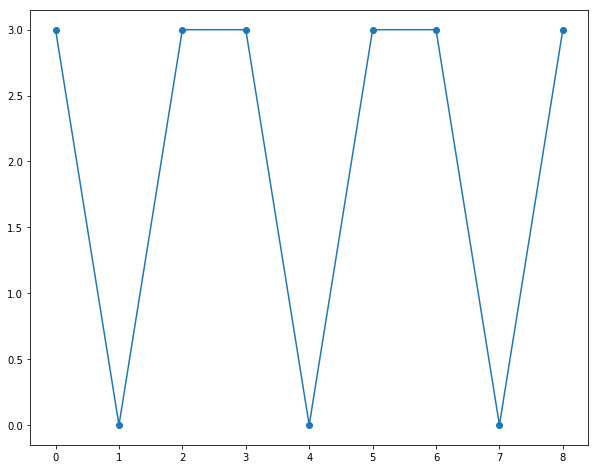

In [70]:
plt.plot(np.real(val),'-o')
plt.show()